Ideias para analise:
- 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
result = pd.read_csv(r"data copy.csv", index_col=0)



In [3]:
days_to_deal = result["lastChange"]-result["releaseDate"]

result.drop("releaseDate", 1, inplace=True)
result.drop("lastChange", 1, inplace=True)
# result.drop("normalPrice", 1, inplace=True)
# result.to_csv(r"data copy.csv", index=True)
result["days_to_deal"] = days_to_deal

In [4]:
result


,savings,metacriticScore,steamRatingPercent,dealRating,days_to_deal
4,90.045023,68,77,9.6,24761061
5,90.865144,88,84,9.6,180793566
6,85.042521,91,92,9.6,253048689
7,85.034014,91,88,9.6,167169351
8,90.015003,88,84,9.5,180817817
...,...,...,...,...,...
40527,0.000000,52,35,0.0,229277113
40528,0.000000,52,35,0.0,148752012
40529,0.000000,52,35,0.0,228495952
40530,0.000000,52,35,0.0,204649413


In [5]:
# indexes = list()
# for index, row in result.iterrows():
#     if (row["isOnSale"] == 0):
#         indexes.append(index)
# print(len(indexes))
# result.drop(indexes, axis=0, inplace=True)
# result.drop("Unnamed: 0", 1, inplace=True)
# result.to_csv(r"data copy.csv", index=True)

Text(0, 0.5, 'Saving')

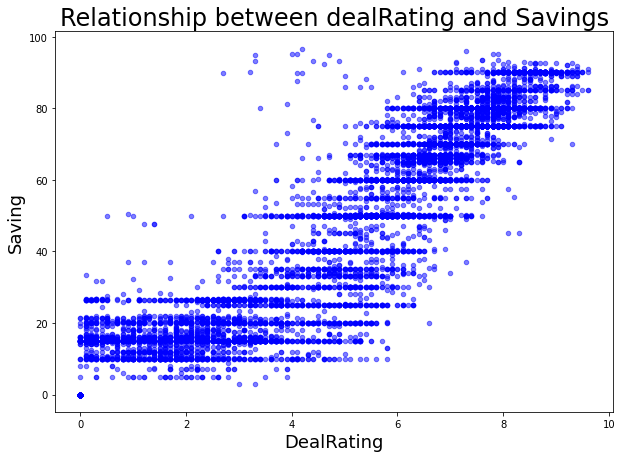

In [6]:
import matplotlib.pyplot as plt

ax1= result.plot(kind='scatter', x='dealRating',y='savings', color='blue',alpha=0.5, figsize=(10,7))


plt.title('Relationship between dealRating and Savings', size=24)
plt.xlabel('DealRating', size=18)
plt.ylabel('Saving', size=18)

In [7]:
# 

X = result.drop('dealRating', axis = 1)   # X  For Train
y = result['dealRating']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20)

In [8]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print(model.score(X_test, y_test))
yhat = model.predict(X_test)
df_pred = pd.DataFrame({'Index': y_test.index, 'Actual': y_test.ravel(), 'Predicted': yhat.ravel()})
df_pred


0.9695645005320186


,Index,Actual,Predicted
0,10775,4.3,5.290449
1,1310,7.8,7.861408
2,10698,4.3,5.862199
3,10370,4.4,4.216362
4,449,8.5,8.274177
...,...,...,...
3136,36777,0.0,-0.006194
3137,29207,0.0,-0.084541
3138,8840,4.8,4.432058
3139,29713,0.0,0.052348


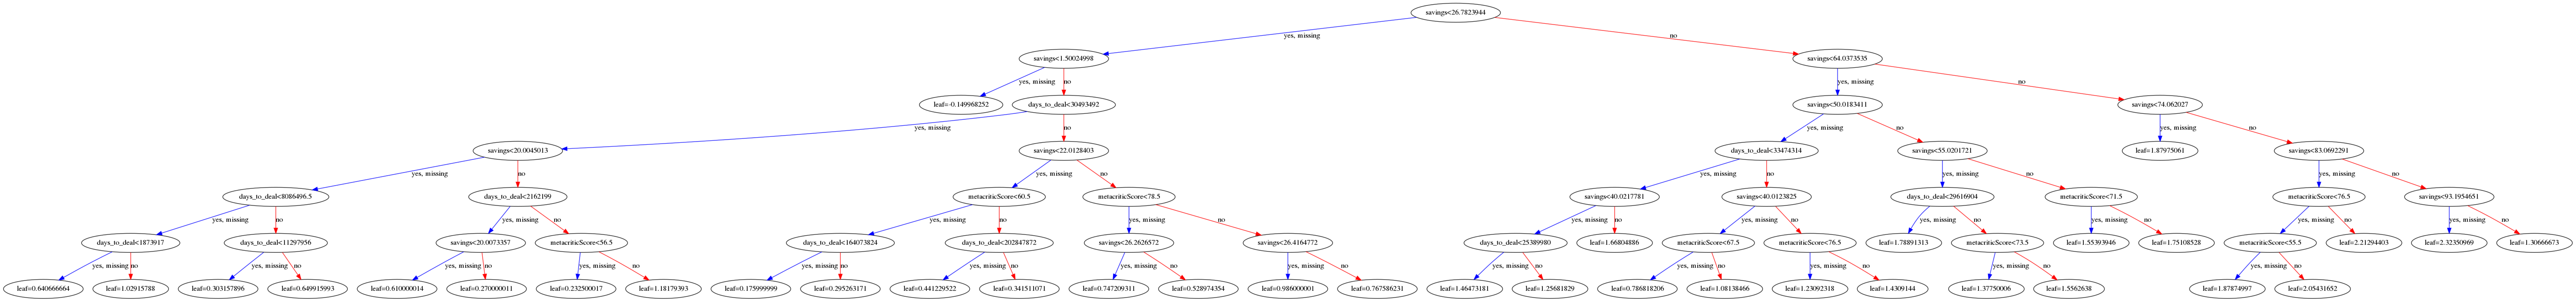

In [9]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 250,200
plot_tree(model)
plt.show()

In [10]:

from sklearn.tree import DecisionTreeRegressor

arvore = DecisionTreeRegressor()


arvore.fit(X_train, y_train)


DecisionTreeRegressor()

In [11]:
# plt.plot(X_test, model.predict(X_test), color='red',linewidth=3)
y_pred = arvore.predict(X_test)
df_pred = pd.DataFrame({'Index': y_test.index, 'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()})
df_pred

,Index,Actual,Predicted
0,10775,4.3,4.7
1,1310,7.8,7.8
2,10698,4.3,5.0
3,10370,4.4,4.9
4,449,8.5,8.3
...,...,...,...
3136,36777,0.0,0.0
3137,29207,0.0,0.0
3138,8840,4.8,4.2
3139,29713,0.0,0.0


In [12]:
print(arvore.score(X_test,y_test))


0.9470236733482397
